# Importando librerías

In [1]:
import pandas as pd
import numpy as np
# Valores faltantes
import missingno as msno
# Atípicos
import matplotlib.pyplot as plt
import seaborn as sns

# Importando las bases de datos

In [2]:
df_name_basics_3 = pd.read_csv('./db/name.basics.tsv', sep='\t', on_bad_lines='skip')

# Exploración de datos

In [5]:
df_name_basics_3.shape
#(13992786, 6)

(13992786, 6)

##### Reemplazar para que numpy entienda valores faltantes


In [3]:
df_name_basics_3.replace({'\\N': np.nan}, inplace=True)

In [7]:
df_name_basics_3.tail(13)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
13992773,nm9993706,Michal Jackowski,NaN,NaN,sound_department,tt8744250
13992774,nm9993707,Alexandra Rago,NaN,NaN,NaN,NaN
13992775,nm9993708,Eli Bevins,NaN,NaN,"producer,director,writer","tt11702702,tt14508814,tt11772904,tt11772812"
13992776,nm9993709,Lu Bevins,NaN,NaN,"producer,director,writer","tt17717854,tt11772904,tt11772812,tt11697102"
13992777,nm9993710,Nestor Rudnytskyy,NaN,NaN,NaN,NaN
13992778,nm9993711,David Gluzman,NaN,NaN,NaN,NaN
13992779,nm9993712,Corny O'Connell,NaN,NaN,NaN,NaN
13992780,nm9993713,Sambit Mishra,NaN,NaN,"writer,producer","tt20319332,tt27843798,tt27191658,tt10709066"
13992781,nm9993714,Romeo del Rosario,NaN,NaN,"animation_department,art_department","tt11657662,tt14069590,tt2455546"
13992782,nm9993716,Essias Loberg,NaN,NaN,NaN,NaN


# Valores nulos

<AxesSubplot:>

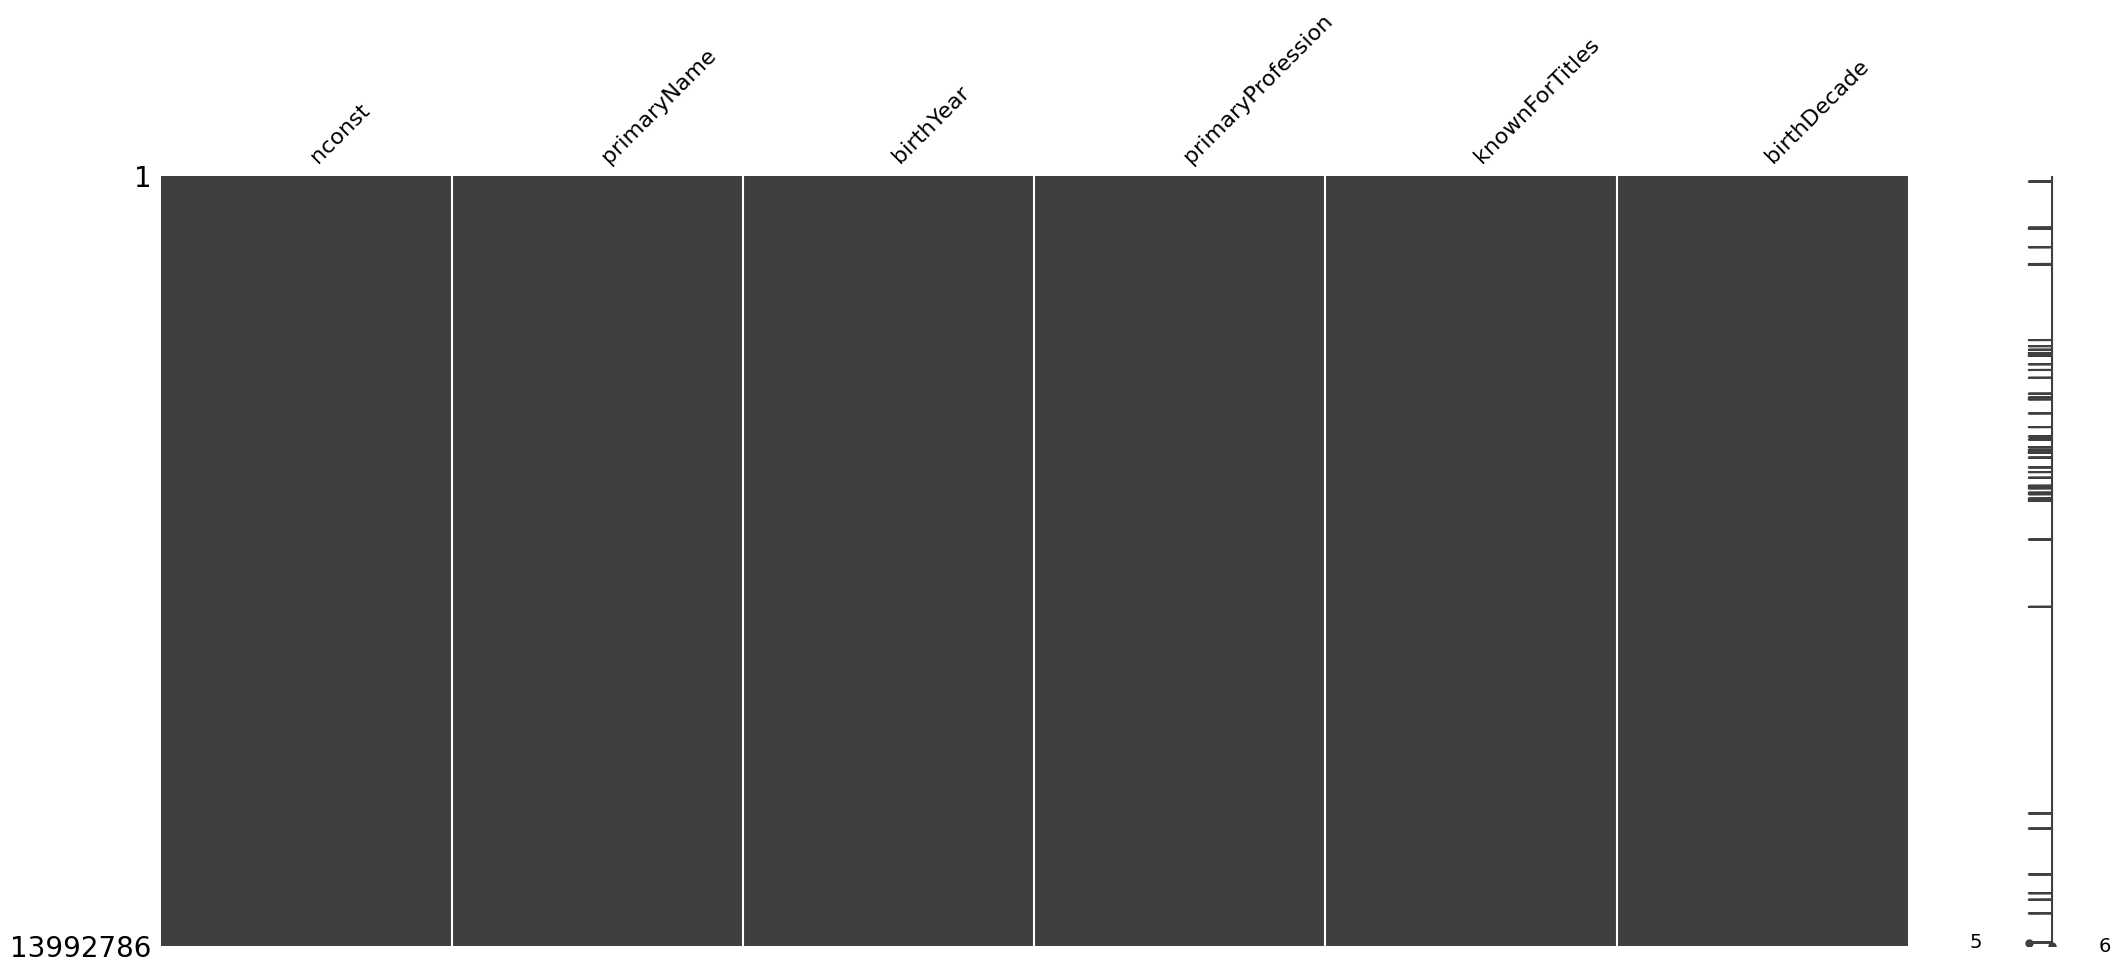

In [54]:
msno.matrix(df_name_basics_3)

In [7]:
df_nulos_name_basics_3 = df_name_basics_3.isnull().sum()

df_nulos_name_basics_3

nconst                      0
primaryName                54
birthYear            13360152
deathYear            13755576
primaryProfession     2716189
knownForTitles        1582618
dtype: int64

###### Eliminar

In [4]:
df_name_basics_3.drop(columns=['deathYear'], inplace=True)

###### Inputar

In [5]:
# Reemplazar los valores nulos en 'knownForTitles' con 'Desconocido'
df_name_basics_3['knownForTitles'] = df_name_basics_3['knownForTitles'].fillna('Desconocido')


In [6]:
# Reemplazar los valores nulos en 'birthYear' con el valor 2024
df_name_basics_3['birthYear'] = df_name_basics_3['birthYear'].fillna(2024)


In [7]:
# Reemplazar los valores nulos en 'primaryProfession     ' con el valor 2024
df_name_basics_3['primaryProfession'] = df_name_basics_3['primaryProfession'].fillna('Desconocido')

In [8]:
# Convertir birthYear a tipo entero
df_name_basics_3['birthYear'] = df_name_basics_3['birthYear'].astype(int)
# Crear la columna para la década de nacimiento
df_name_basics_3['birthDecade'] = (df_name_basics_3['birthYear'] // 10) * 10

# Before clean

In [ ]:
msno.matrix(df_name_basics_3)

In [66]:
df_name_basics_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13992786 entries, 0 to 13992785
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   nconst             object
 1   primaryName        object
 2   birthYear          int32 
 3   primaryProfession  object
 4   knownForTitles     object
 5   birthDecade        int32 
dtypes: int32(2), object(4)
memory usage: 533.8+ MB


# Encontrar agrupaciones 

###### Agrupacion de primaryProfession

In [9]:
# Dividir los valores de la columna "primaryProfession" en listas separadas por comas
professions_split = df_name_basics_3['primaryProfession'].str.split(',')

# Aplanar todas las listas en una sola y crear un DataFrame temporal para contar los valores únicos
all_professions = pd.Series([item for sublist in professions_split.dropna() for item in sublist])

# Contar la frecuencia de cada profesión
professions_count = all_professions.value_counts()

# Mostrar los resultados
print(professions_count)

actor                        3239282
Desconocido                  2716189
actress                      1958144
miscellaneous                1455209
producer                     1242891
writer                        930838
camera_department             826634
director                      760778
art_department                495694
sound_department              405172
cinematographer               404453
editor                        373231
composer                      352593
music_department              289523
assistant_director            270199
visual_effects                250808
make_up_department            235885
animation_department          228257
production_manager            218029
archive_footage               203211
editorial_department          197552
costume_department            164852
soundtrack                    152375
transportation_department     107663
art_director                   97659
stunts                         92722
script_department              91904
l

In [10]:
# Obtener solo los nombres de los títulos como un índice
names_only_professions = professions_count.index

# Convertir los nombres a una lista si es necesario
#professions_unique = pd.DataFrame(names_only_professions.tolist())
professions_unique_array = names_only_professions.tolist()

# Mostrar el resultado
print(professions_unique_array[:10])

['actor', 'Desconocido', 'actress', 'miscellaneous', 'producer', 'writer', 'camera_department', 'director', 'art_department', 'sound_department']


In [11]:
type(professions_unique_array)

list

In [12]:
# Contar el número de elementos en la lista
len(professions_unique_array)


47

###### Agrupacion de knownForTitles

In [13]:
# Dividir los valores de la columna "knownForTitles" en listas separadas por comas
knownForTitles_split = df_name_basics_3['knownForTitles'].str.split(',')

# Aplanar todas las listas en una sola y crear un DataFrame temporal para contar los valores únicos
all_knownForTitles = pd.Series([item for sublist in knownForTitles_split.dropna() for item in sublist])

# Contar la frecuencia de cada profesión
knownForTitles_count = all_knownForTitles.value_counts()

# Mostrar los resultados
print(knownForTitles_count)

Desconocido    1582618
tt0806910        15223
tt0407423        12703
tt0123338        11914
tt0441074        10755
                ...   
tt0865352            1
tt12917066           1
tt3797474            1
tt6419430            1
tt2180158            1
Length: 2062859, dtype: int64


In [14]:
# Obtener solo los nombres de los títulos como un índice
names_only = knownForTitles_count.index

# Convertir los nombres a una lista si es necesario
#knownForTitles_unique = pd.DataFrame(names_only.tolist())
knownForTitles_unique = names_only.tolist()

# Mostrar el resultado
print(knownForTitles_unique[:10])


['Desconocido', 'tt0806910', 'tt0407423', 'tt0123338', 'tt0441074', 'tt22014400', 'tt0206501', 'tt0896893', 'tt0133302', 'tt0065323']


In [19]:
type(knownForTitles_unique)

list

In [24]:
# Contar el número de elementos en la lista
len(knownForTitles_unique)

2062859

# Normalizando 

#### profession

In [15]:
# Crear un DataFrame para las profesiones únicas
professions_unique = pd.DataFrame({
    'profession_id': range(1, 48),
    'profession': professions_unique_array
})



In [29]:
# Descomponer la columna primaryProfession
df_expanded_name_basics_3 = df_name_basics_3.assign(primaryProfession=df_name_basics_3['primaryProfession'].str.split(',')).explode('primaryProfession')

# Unir con la tabla de profesiones únicas para obtener los IDs de profesiones
df_expanded_name_basics_3 = pd.merge(df_expanded_name_basics_3, professions_unique, left_on='primaryProfession', right_on='profession', how='left')

# Eliminar la columna primaryProfession original y renombrar la columna profession_id
df_expanded_name_basics_3 = df_expanded_name_basics_3.drop(columns=['primaryProfession', 'profession']).rename(columns={'profession_id': 'profession_id'})



#### knownForTitles

In [30]:
# Crear un DataFrame para los títulos conocidos únicos
knownForTitles_unique = pd.DataFrame({
    'title_id': range(1, 2062860),
    'title': knownForTitles_unique
})


In [31]:
# Descomponer la columna knownForTitles
df_expanded_name_basics_3 = df_name_basics_3.assign(knownForTitles=df_name_basics_3['knownForTitles'].str.split(',')).explode('knownForTitles')

# Unir con la tabla de títulos conocidos únicos para obtener los IDs de títulos
df_expanded_name_basics_3 = pd.merge(df_expanded_name_basics_3, knownForTitles_unique, left_on='knownForTitles', right_on='title', how='left')

# Eliminar la columna knownForTitles original y renombrar la columna title_id
df_expanded_name_basics_3 = df_expanded_name_basics_3.drop(columns=['knownForTitles', 'title']).rename(columns={'title_id': 'title_id'})


# Exportando

#### profession

In [16]:
# Guardar la tabla de profesiones únicas en un archivo CSV
professions_unique.to_csv('professions_unique.csv', index=False)

In [ ]:
# Guardar el DataFrame normalizado en un archivo CSV
df_expanded_name_basics_3.to_csv('name_basics_3_normalized.csv', index=False)

#### knownForTitles

In [32]:
# Guardar la tabla de títulos conocidos únicos en un archivo CSV
knownForTitles_unique.to_csv('knownForTitles_unique.csv', index=False)

In [ ]:
# Guardar el DataFrame normalizado en un archivo CSV
df_expanded_name_basics_3.to_csv('name_basics_3_normalized.csv', index=False)